In [1]:
# Bibliotecas
import sys, numpy as np, matplotlib.pyplot as plt, plotly.graph_objects as go, pandas as pd
sys.path.append('../ppgsi_mdp_risk')

from ppgsi_mdp_risk.function import FunctionFactory
from ppgsi_mdp_risk.curves import EquivalentCostCurve
from ppgsi_mdp_risk.graph import CurvePlots
from ppgsi_mdp_risk.processing import BuildCurve

%load_ext autoreload
%autoreload 2

# MDP Simples

As seguintes metodologias foram aplicadas neste ambiente:

|Metodologia|Descritivo|
|--|--|
|Exponential Utility Function||
|Piecewise-Linear||
|Polynomial Utility Function||
|VaR (Value at Risk)||
|CVaR (Conditional Value at Risk)||



## Configurações

In [67]:
# Parametros
nm_exponential_function = 'ExponentialFunction'
nm_pwl_function = 'PiecewiseTransformation'
nm_polynomial_function = 'PolynomialFunction'
nm_var_method = 'VAR'
nm_cvar_method = 'ConditionalVAR'
_quiet = True

# Objetos ---------------------------
# -----------------------------------

# Funções
_ff = FunctionFactory.FunctionFactory()
_exp = _ff.get_function(nm_exponential_function)
_pwl = _ff.get_function(nm_pwl_function)
_poly = _ff.get_function(nm_polynomial_function)
_var = _ff.get_function(nm_var_method)
_cvar = _ff.get_function(nm_cvar_method)

# Cria dicionario de objetos para Calculo
_ecc = {}
_ecc[nm_exponential_function] = EquivalentCostCurve.EquivalentCostCurve(_exp, nm_exponential_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_pwl_function] = EquivalentCostCurve.EquivalentCostCurve(_pwl, nm_pwl_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_polynomial_function] = EquivalentCostCurve.EquivalentCostCurve(_poly, nm_polynomial_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_var_method] = EquivalentCostCurve.EquivalentCostCurve(_var, nm_var_method, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_cvar_method] = EquivalentCostCurve.EquivalentCostCurve(_cvar, nm_cvar_method, rini_p=0.05, rend_p=1, step_p=0.05)

# Plots
_cp = CurvePlots.CurvePlots(lib='matplotlib')
_bc = BuildCurve.BuildCurve(_cp)

# Parametros Especificos
c, p = 1, 0.5
list_p = np.arange(0.1, 1, 0.1)

# Calculo Lambda Extreme
lambda_extreme = _exp._get_lambda_extreme(p, c)

list_lambdas_pos = np.arange(0.1, lambda_extreme, 0.001)
list_lambdas_neg = np.arange(-100, -0.1, 0.1)

list_k_pos = np.arange(0.9, 1, 0.00001)
list_k_neg = np.arange(-1, -0.9, 0.00001)

list_betas_pos = np.arange(1, 60, 0.1)
list_betas_neg = np.arange(1/10**5, 0.1, 0.001)

list_betas = [1/10**9, 0.1, 1, 2, 3, 10, 20, 50]

list_alphas = [0.00001, 0.01, 0.1, 0.5, 0.9, 0.95, 0.99, 0.995, 0.9995]
# list_alphas = [0.9, 0.95, 0.99, 0.995, 0.9995]

## Dicionários

In [3]:
_empirical_result = {}
_multi_empirical_result = {}

_analytical_result = {}
_multi_analytical_result = {}

## Exponential Utility Function

$$
V(s) = \frac{-e^{\lambda c} \times p}{(1 - e^{\lambda c} \times (1-p))}
$$

### Análise Empírica

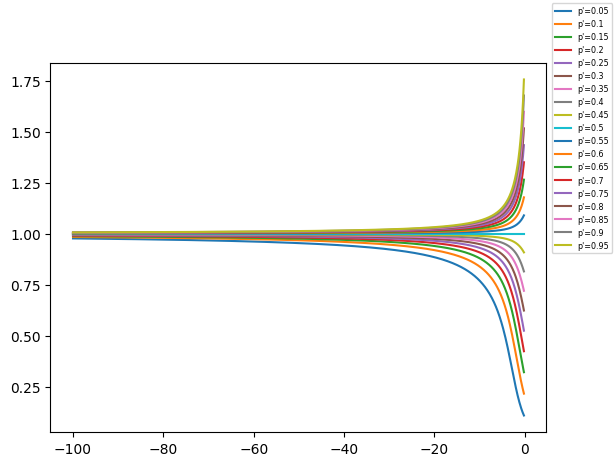

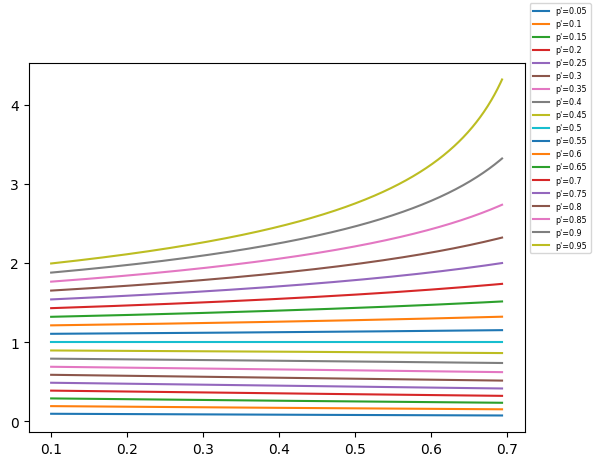

In [4]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_exponential_function,
        _ecc=_ecc[nm_exponential_function],
        list_neg=list_lambdas_neg,
        list_pos=list_lambdas_pos
    )

_empirical_result['EXP-min'] = c_min.copy()
_empirical_result['EXP-max'] = c_max.copy()

C:\Users\Miyamura\Desktop\GIT_MESTRADO\ppgsi_comparable_mdp_risk\notebooks\../ppgsi_mdp_risk\ppgsi_mdp_risk\function\ExponentialFunction.py:23: RuntimeWarning: invalid value encountered in log
  return np.log(v1/v2) * 1/l


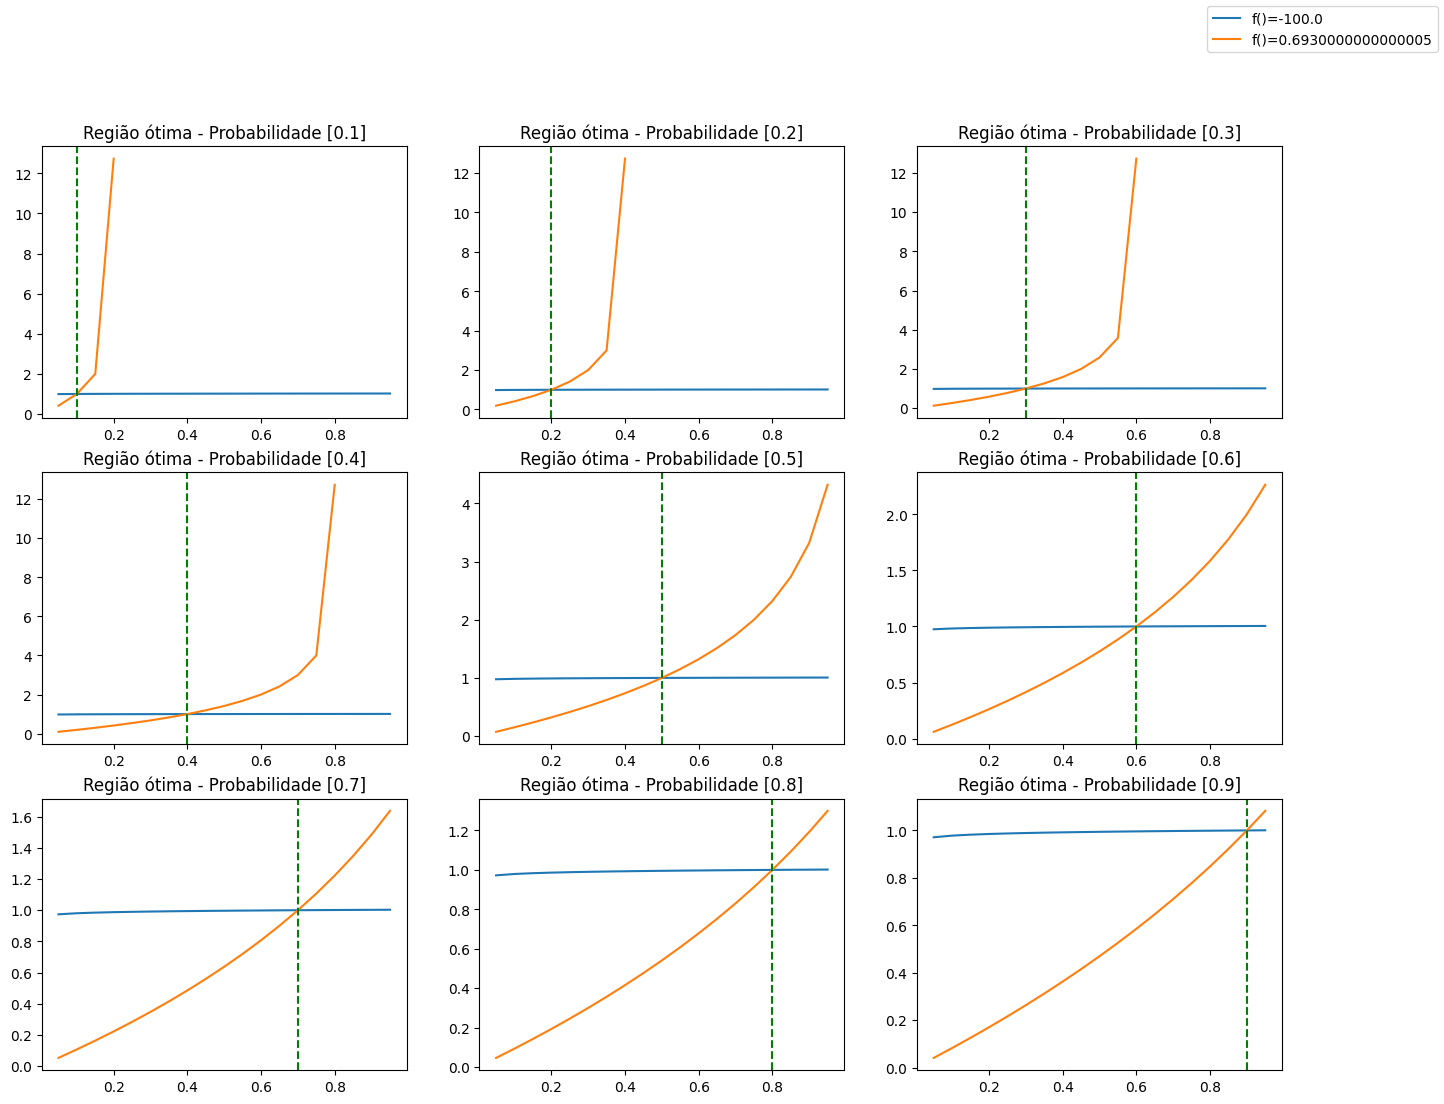

In [5]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_exponential_function,
        _ecc=_ecc[nm_exponential_function],
        list_neg=list_lambdas_neg,
        list_pos=list_lambdas_pos
    )

_multi_empirical_result['EXP'] = dict_curves.copy()

### Formalização dos Limites

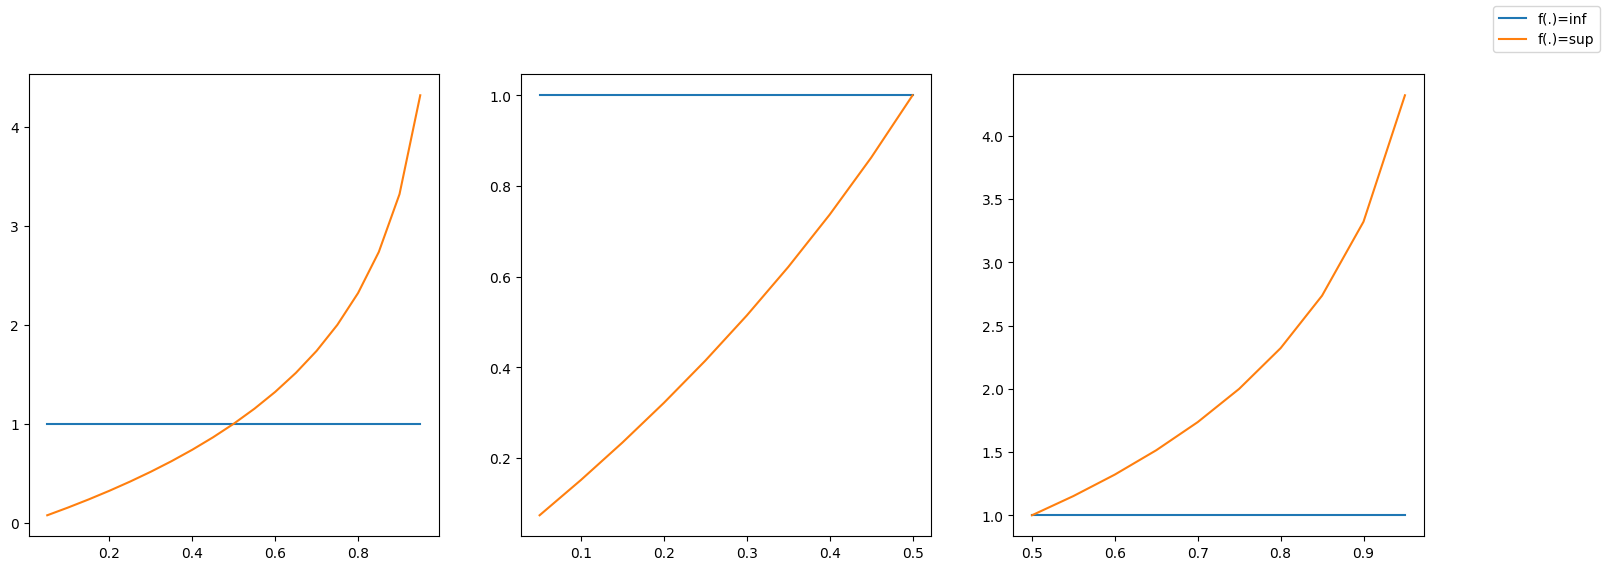

In [29]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_exponential_function,
    _ecc=_ecc[nm_exponential_function]
)

_analytical_result['EXP'] = df_curves.copy()

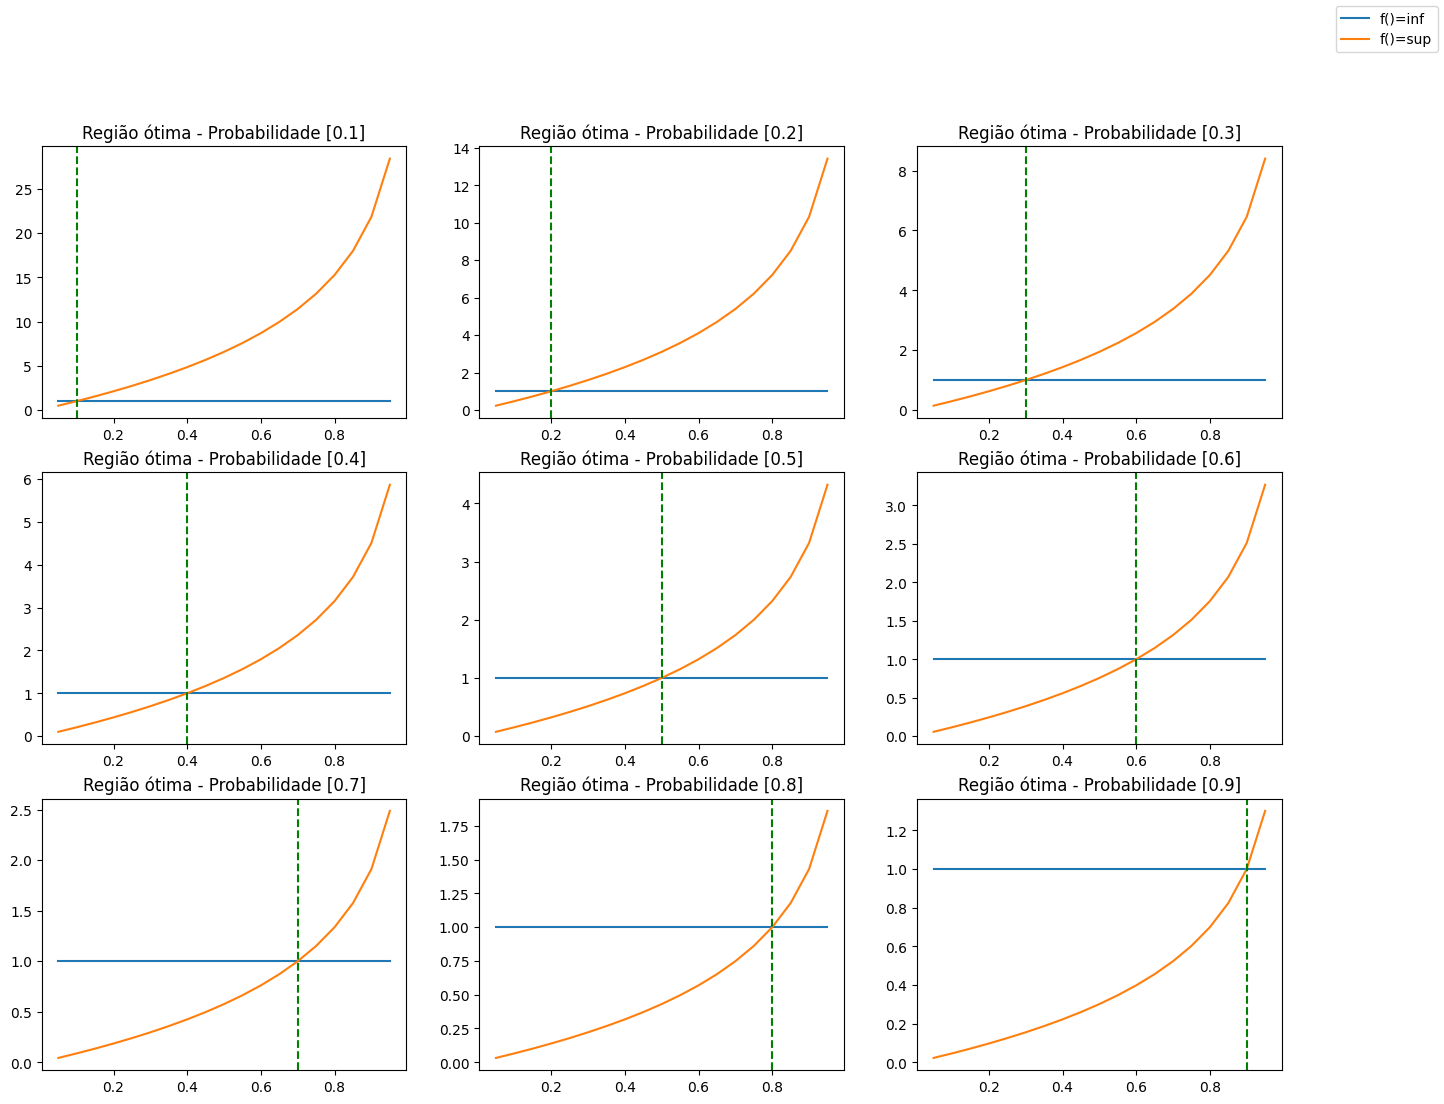

In [30]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits_multiple_prob(
    c=c,
    list_p=list_p,
    nm_function=nm_exponential_function,
    _ecc=_ecc[nm_exponential_function]
)

_multi_analytical_result['EXP'] = df_curves.copy()

## Piecewise-Linear Transformation

$$
V(s) = \frac{c \times (2kp - k + 1)}{(\gamma - 1) \times (k + p - 1) + p - \gamma kp}
$$

### Análise Empírica

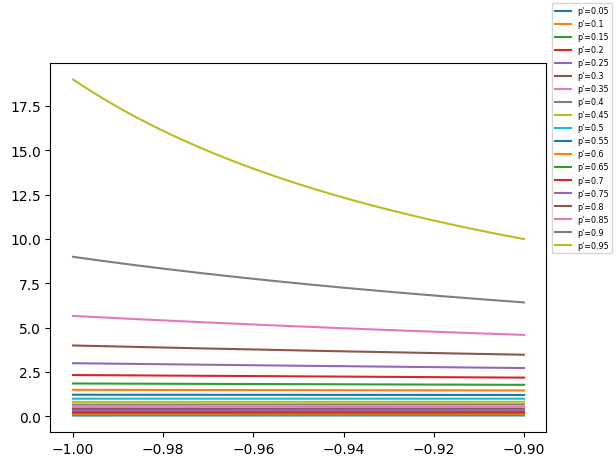

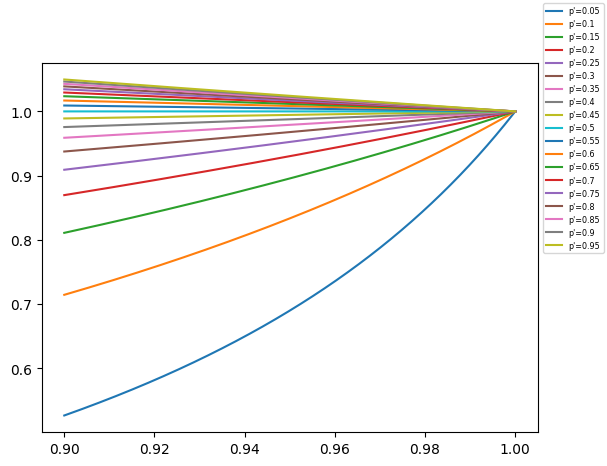

In [8]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_pwl_function,
        _ecc=_ecc[nm_pwl_function],
        list_neg=list_k_neg,
        list_pos=list_k_pos,
        _obj_function=_pwl
    )

_empirical_result['PWL-min'] = c_max.copy()
_empirical_result['PWL-max'] = c_min.copy()

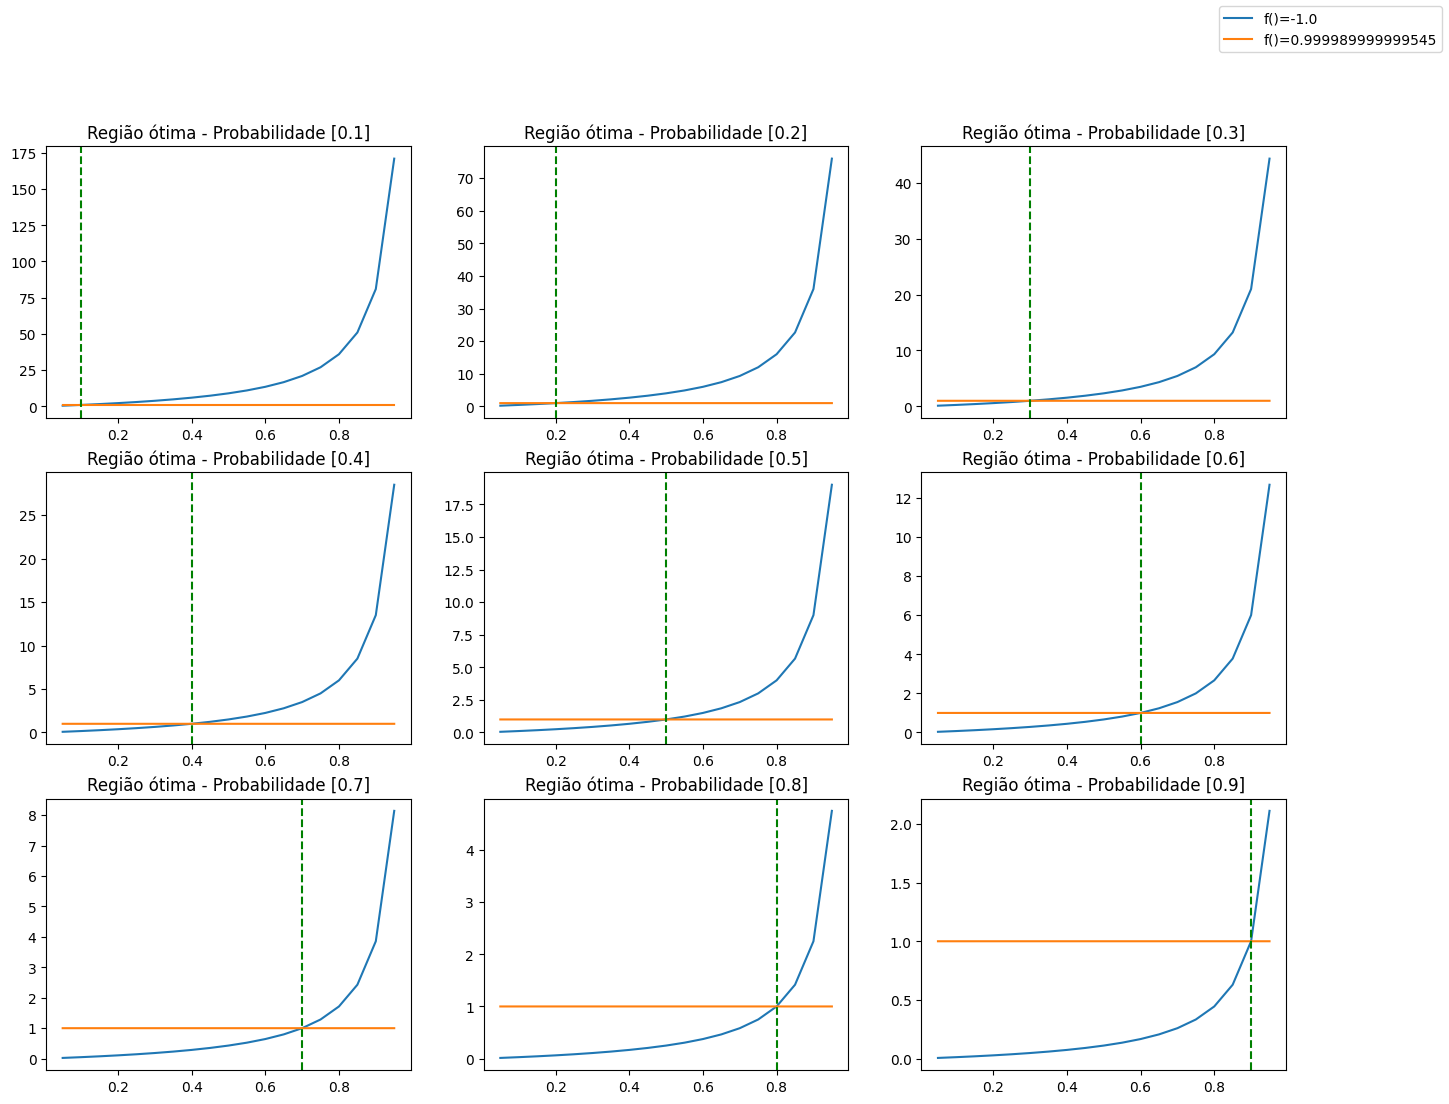

In [9]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_pwl_function,
        _ecc=_ecc[nm_pwl_function],
        list_neg=list_k_neg,
        list_pos=list_k_pos,
        _obj_function=_pwl
    )

_multi_empirical_result['PWL'] = dict_curves.copy()

### Formalização dos Limites

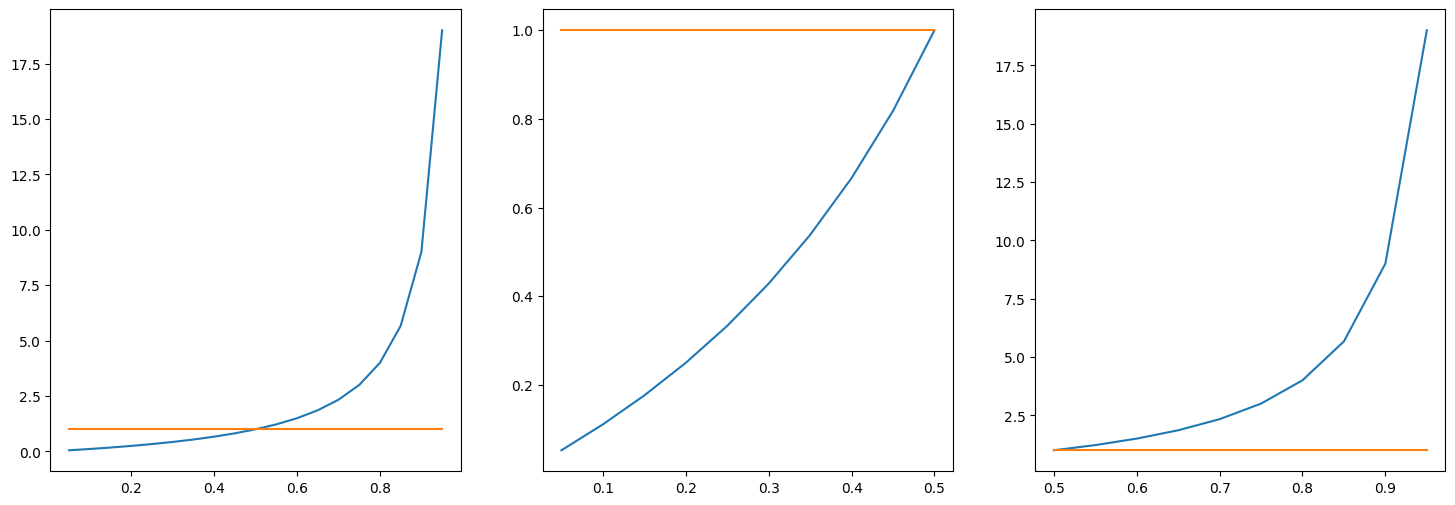

In [10]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_pwl_function,
    _ecc=_ecc[nm_pwl_function]
)

_analytical_result['PWL'] = df_curves.copy()

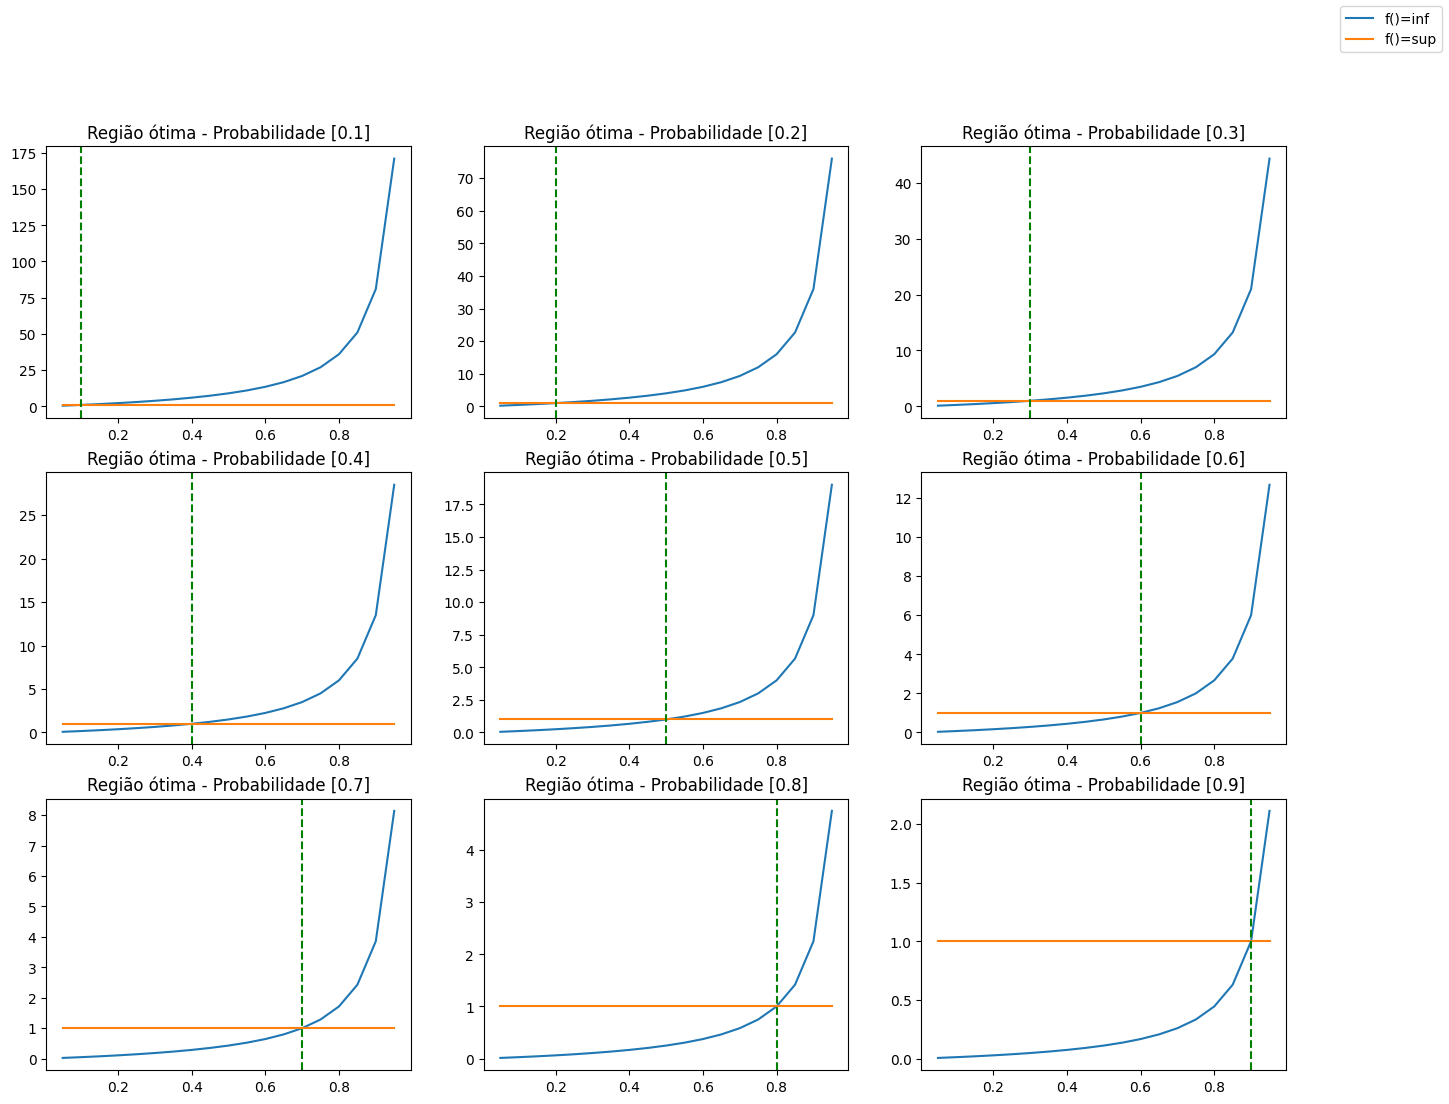

In [11]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits_multiple_prob(
    c=c,
    list_p=list_p,
    nm_function=nm_pwl_function,
    _ecc=_ecc[nm_pwl_function]
)

_multi_analytical_result['PWL'] = df_curves.copy()

## Polynomial Utility Function

$$
V(s) = 
$$

### Análise Empírica

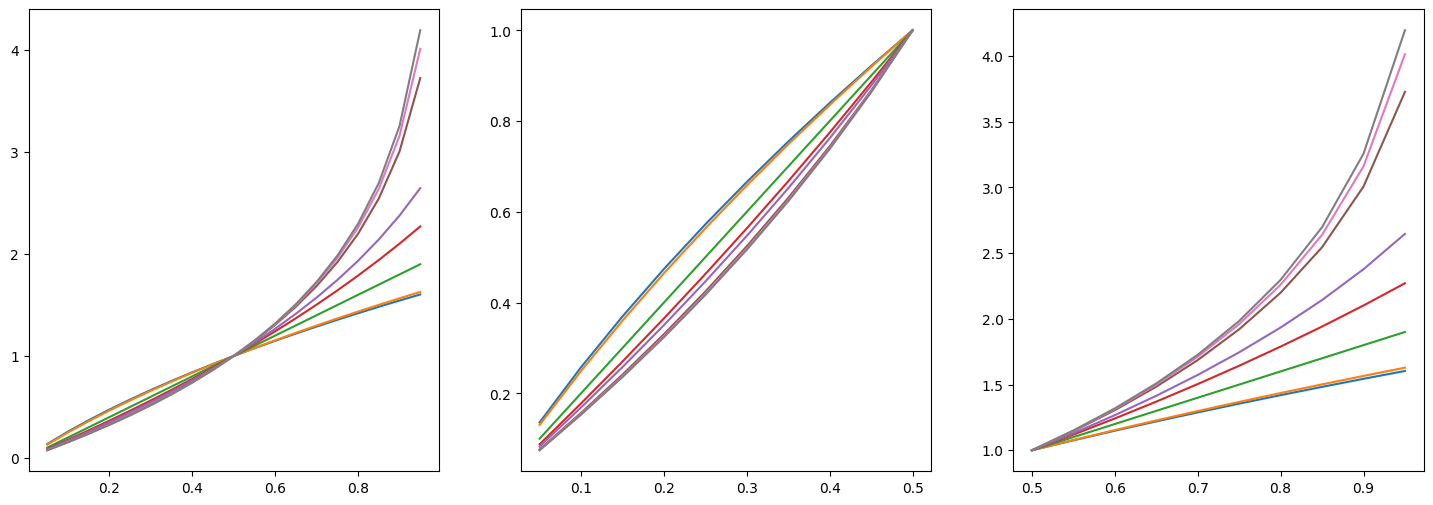

,1.000000e-09,1.000000e-01,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01,2.000000e+01,5.000000e+01
0.05,0.1359,0.1304,0.1,0.0877,0.0829,0.0766,0.0753,0.0745
0.10,0.2575,0.2493,0.2,0.1777,0.1688,0.1568,0.1544,0.1530
0.15,0.3694,0.3601,0.3,0.2701,0.2578,0.2412,0.2378,0.2358
0.20,0.4740,0.4646,0.4,0.3651,0.3503,0.3302,0.3260,0.3236
0.25,0.5724,0.5637,0.5,0.4629,0.4465,0.4242,0.4196,0.4169


In [12]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_polynomial_function,
        _ecc=_ecc[nm_polynomial_function],
        list_rf=list_betas
    )

display(df.head())

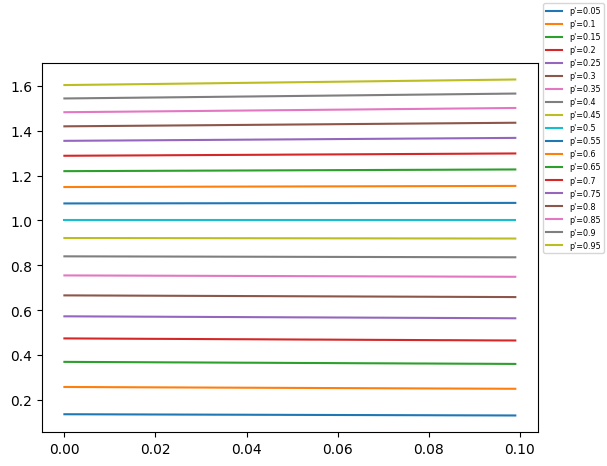

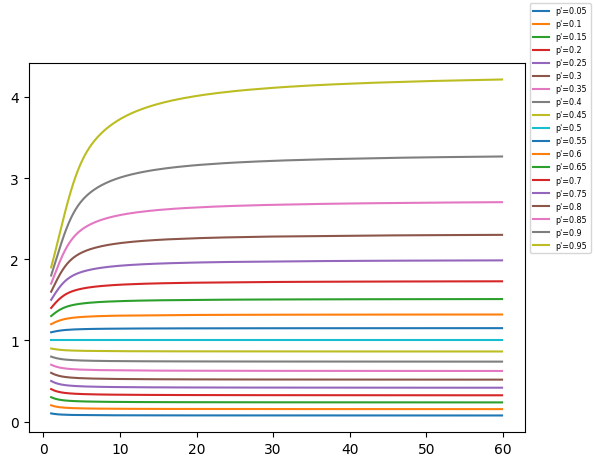

In [13]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_polynomial_function,
        _ecc=_ecc[nm_polynomial_function],
        list_neg=list_betas_neg,
        list_pos=list_betas_pos
    )

_empirical_result['POLY-min'] = c_min.copy()
_empirical_result['POLY-max'] = c_max.copy()

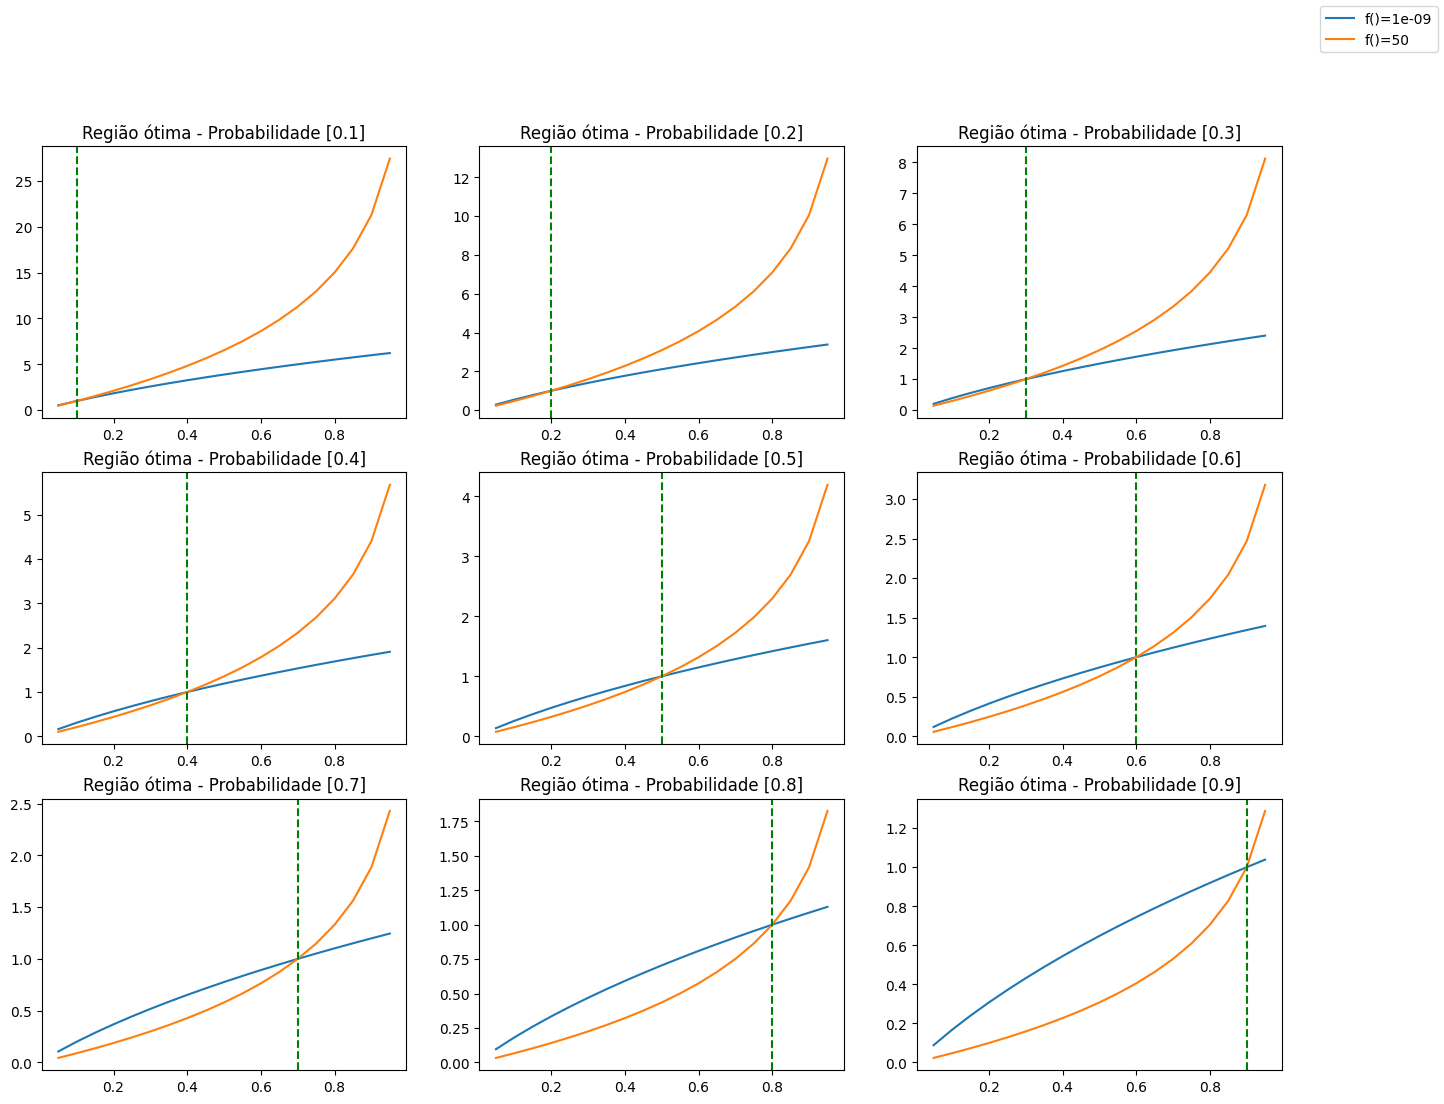

In [14]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_polynomial_function,
        _ecc=_ecc[nm_polynomial_function],
        list_neg=list_betas,
        list_pos=list_betas,
        _obj_function=_pwl
    )

_multi_empirical_result['POLY'] = dict_curves.copy()

### Formalização dos Limites

## VaR (Value at Risk)

### Análise Empírica

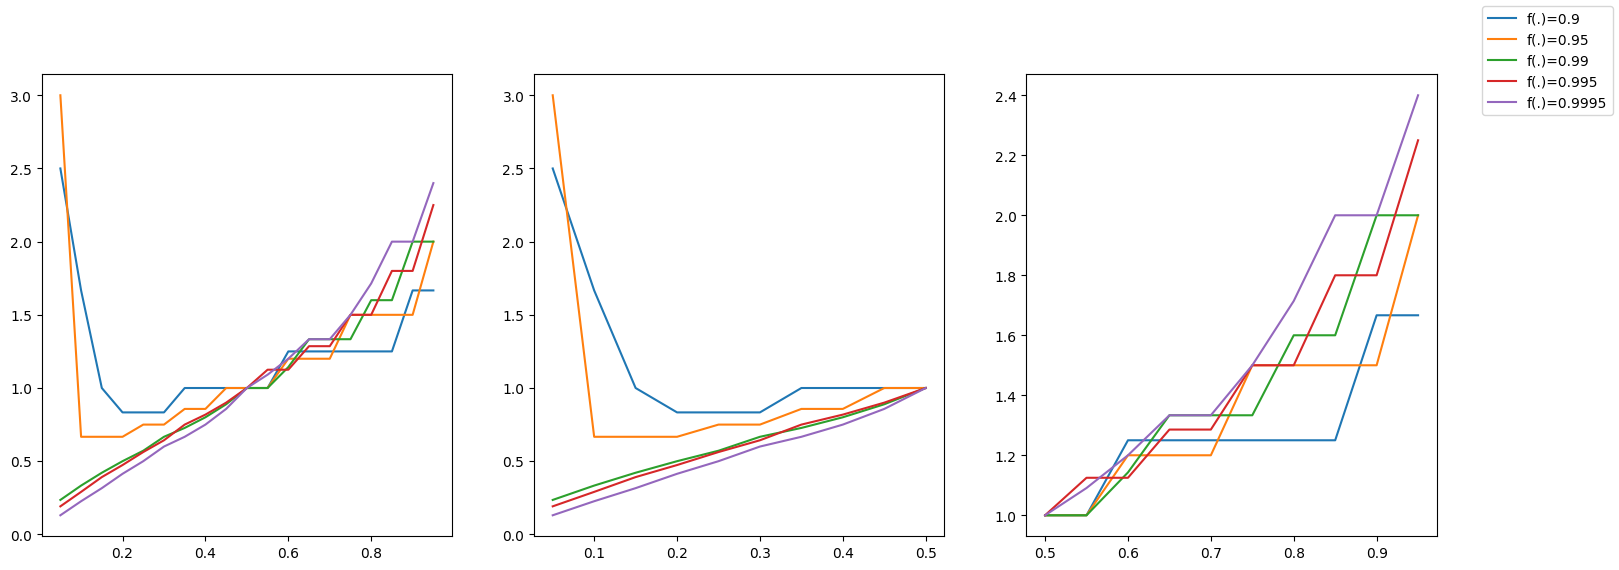

,0.9000,0.9500,0.9900,0.9950,0.9995
0.05,2.500000,3.000000,0.235294,0.191489,0.130435
0.10,1.666667,0.666667,0.333333,0.290323,0.226415
0.15,1.000000,0.666667,0.421053,0.391304,0.315789
0.20,0.833333,0.666667,0.500000,0.473684,0.413793
0.25,0.833333,0.750000,0.571429,0.562500,0.500000


In [48]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_rf=list_alphas,
        summation=True,
        continuous=False
    )

display(df.head())

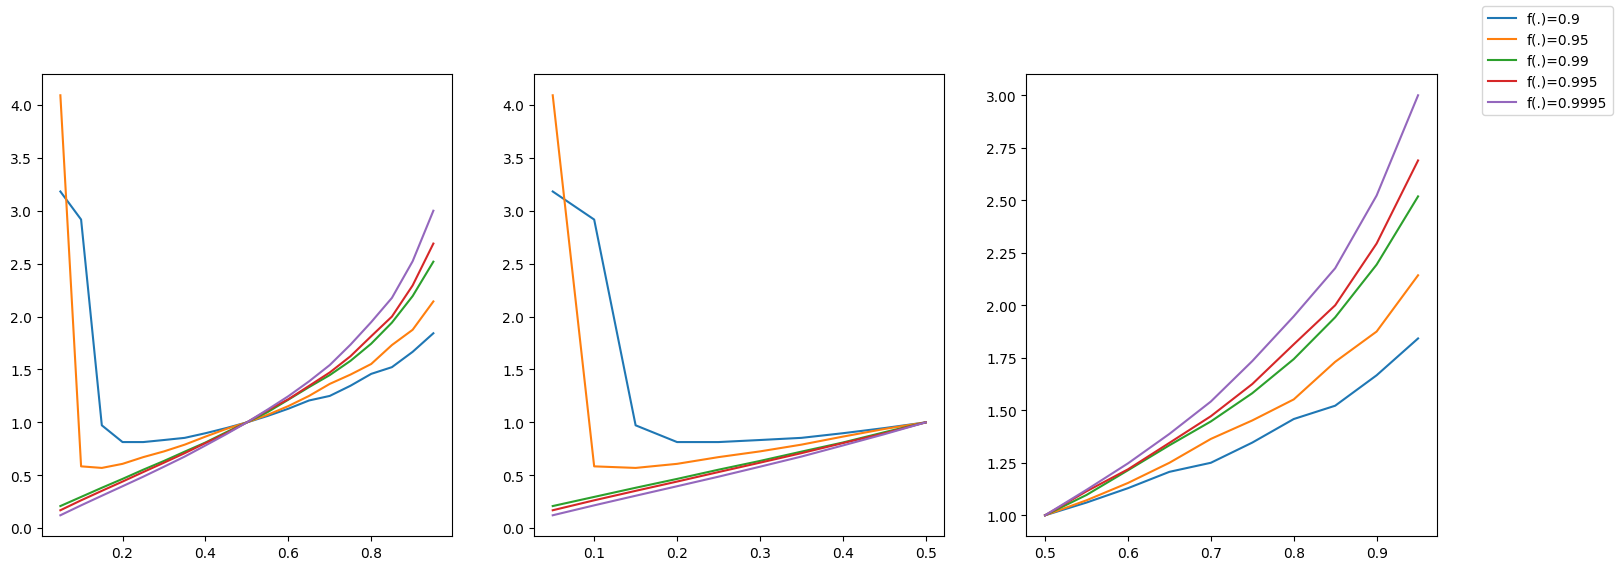

,0.9000,0.9500,0.9900,0.9950,0.9995
0.05,3.181818,4.090909,0.209231,0.169565,0.122112
0.10,2.916667,0.584416,0.295652,0.263514,0.215953
0.15,0.972222,0.569620,0.382022,0.352941,0.306630
0.20,0.813953,0.608108,0.465753,0.440678,0.396429
0.25,0.813953,0.671642,0.552846,0.530612,0.486842


In [49]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_rf=list_alphas,
        summation=True,
        continuous=True
    )

display(df.head())

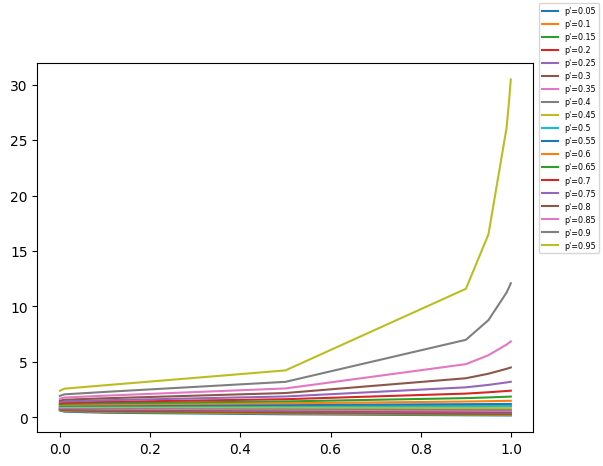

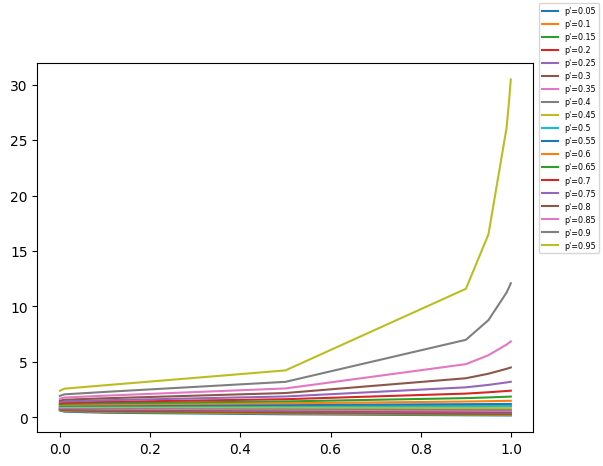

In [74]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_neg=list_alphas,
        list_pos=list_alphas,
        summation=False,
        continuous=True
    )

_empirical_result['VAR-min'] = c_min.copy()
_empirical_result['VAR-max'] = c_max.copy()

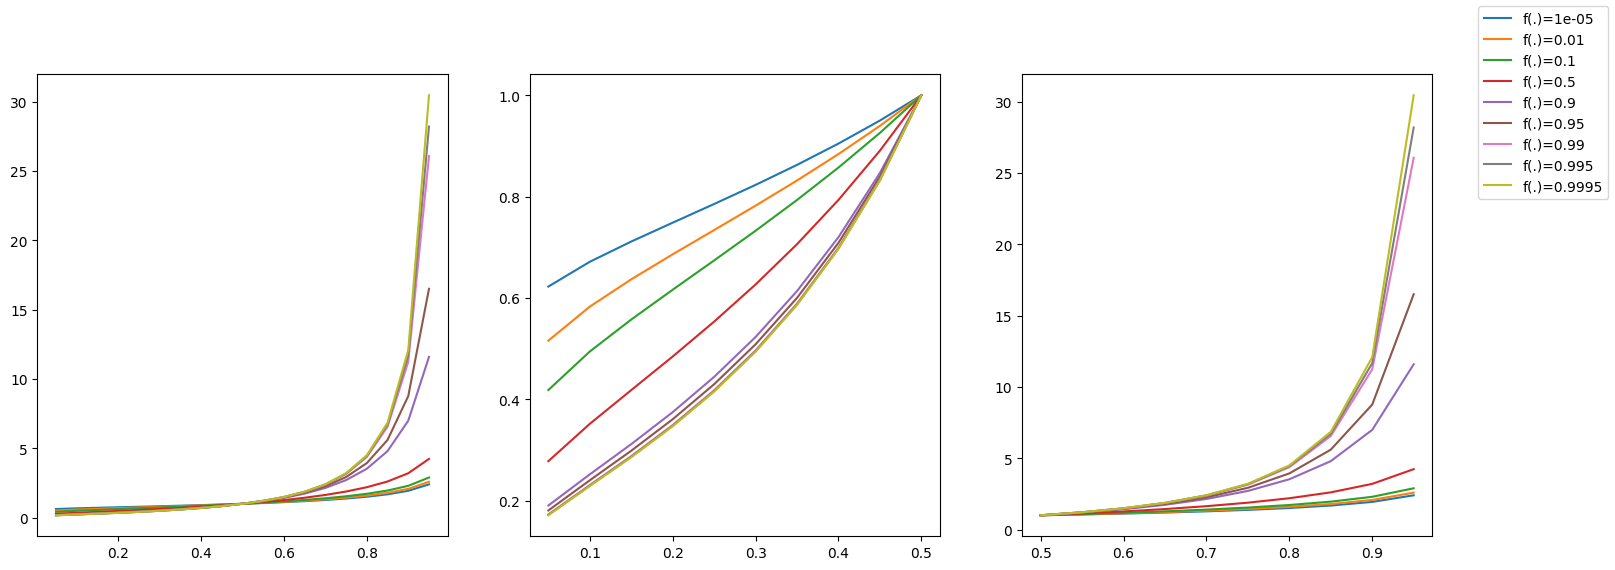

,0.00001,0.01000,0.10000,0.50000,0.90000,0.95000,0.99000,0.99500,0.99950
0.05,0.622564,0.515832,0.418408,0.278097,0.190546,0.180796,0.173123,0.172171,0.171316
0.10,0.671477,0.582939,0.494401,0.351702,0.252032,0.240363,0.231096,0.229941,0.228903
0.15,0.711382,0.636838,0.557496,0.418281,0.311651,0.298611,0.288168,0.286861,0.285684
0.20,0.748622,0.686156,0.616312,0.484550,0.374770,0.360769,0.349461,0.348040,0.346760
0.25,0.785470,0.734044,0.674102,0.553383,0.444353,0.429846,0.418025,0.416533,0.415187


In [69]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_rf=list_alphas,
        summation=False,
        continuous=True
    )

display(df.head())

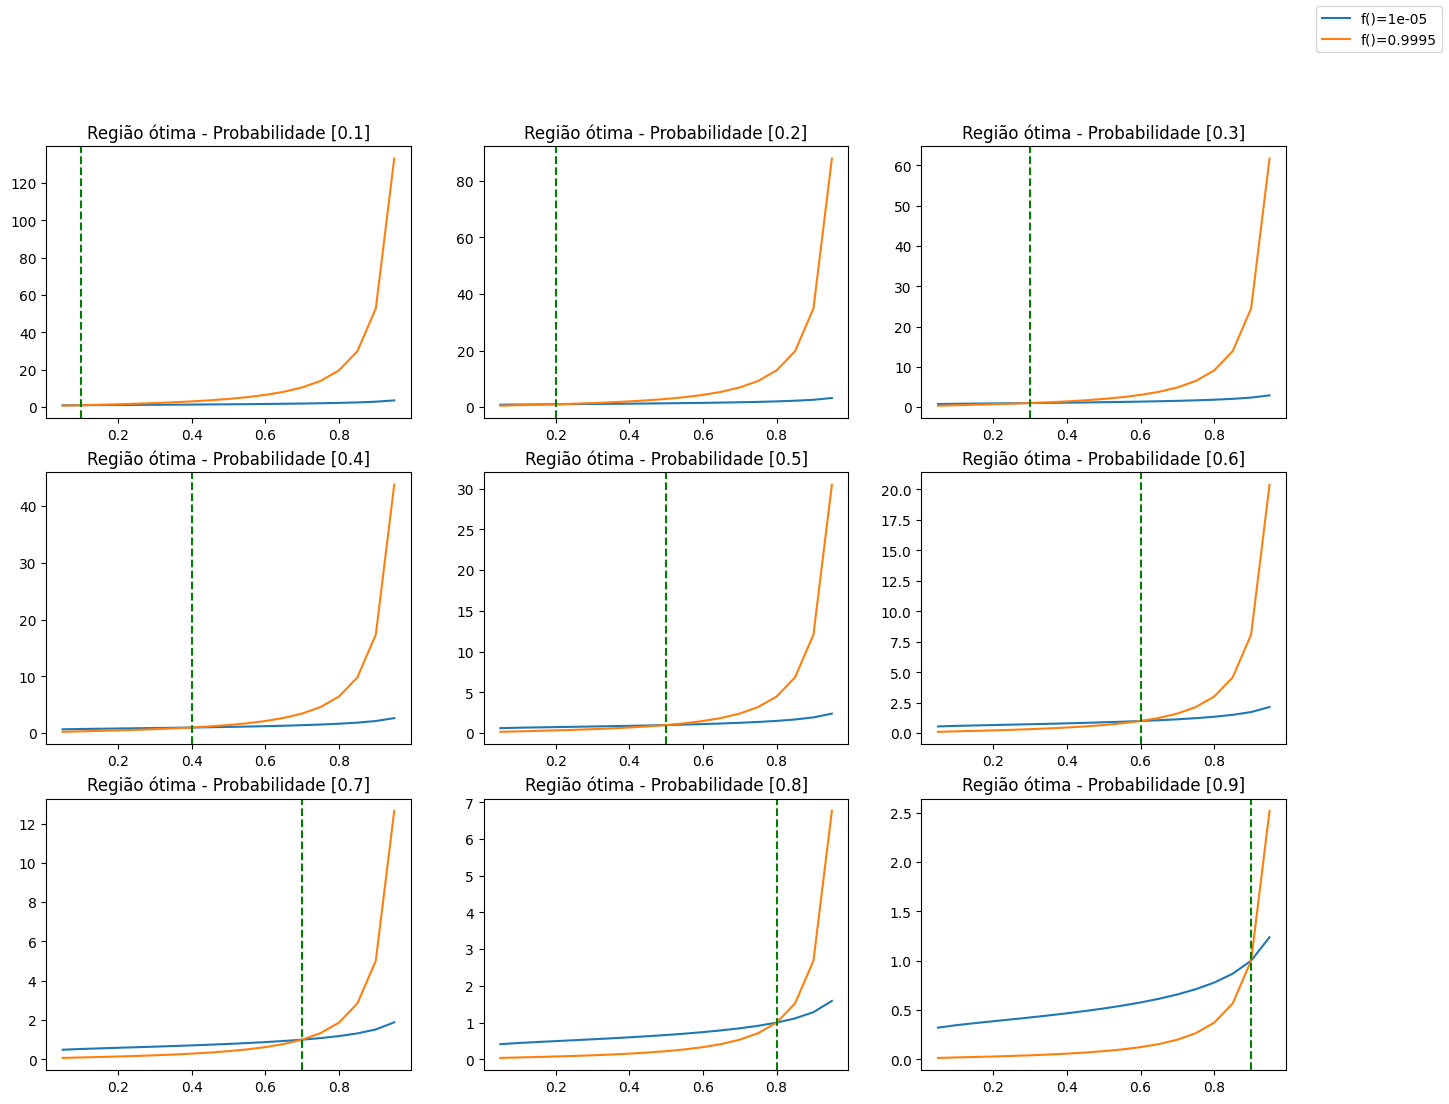

In [70]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_neg=list_alphas,
        list_pos=list_alphas,
        summation=False,
        continuous=True
    )

_multi_empirical_result['VAR'] = dict_curves.copy()

### Formalização dos Limites

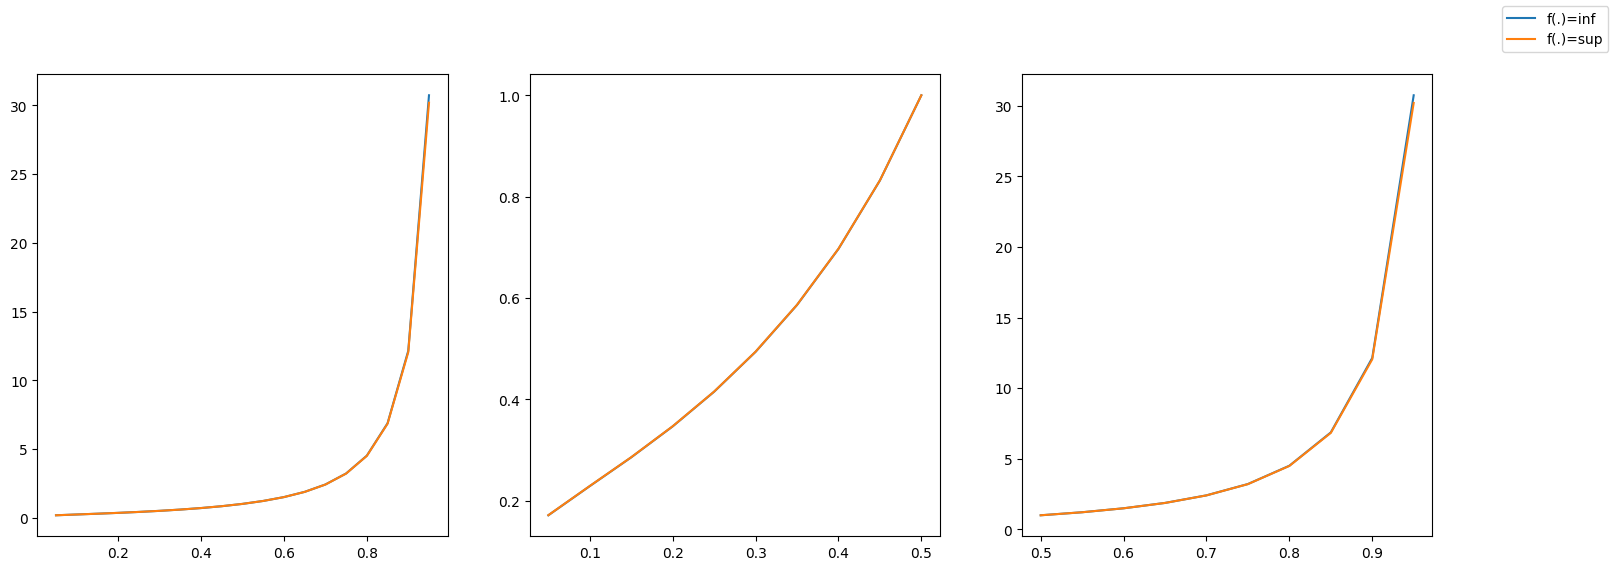

In [71]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_var_method,
    _ecc=_ecc[nm_var_method]
)

_analytical_result['VAR'] = df_curves.copy()

## CVaR (Conditional Value at Risk)

In [81]:
estados = 5
prob = 0.5

prob**estados * (1-prob)**5

0.0009765625

In [21]:
# # Cria dicionario de curvas
# dict_curves = {}
# list_alphas = [0.9, 0.95, 0.99, 0.995]

# # Processa para uma lista de betas
# for alpha in list_alphas:
#     if not _quiet: print(f'Processando alpha={alpha}')
#     dict_curves[alpha] = _ecc[nm_var_method].get_empirical_limit_curve(c, p, alpha=alpha, continuous=False)

# # Cria dataframe com resultados
# df_curves = pd.DataFrame(dict_curves)

# # Realiza plot de cada alpha
# _cp.plot_curve_subplots(
#     dict_curves=dict_curves,
#     filter_prob=0.5
# )

# Comparando Resultados

## Limites Empiricos para Cada Função

In [22]:
def _build_empirical_graph_limits_each_function_plotly(_empirical_result):
    fig_min = go.Figure()
    fig_max = go.Figure()
    
    for _func in _empirical_result:
        curve = _empirical_result[_func]
        params = {
            'x':curve.keys(), 
            'y':curve.values,
            'mode':'lines',
            'name':_func
        }
        
        if 'max' in _func:
            fig_max.add_trace(
                go.Scatter(
                    **params
                )
            )
        elif 'min' in _func:
            fig_min.add_trace(
                go.Scatter(
                    **params
                )
            )
    
    fig_min.show()
    fig_max.show()

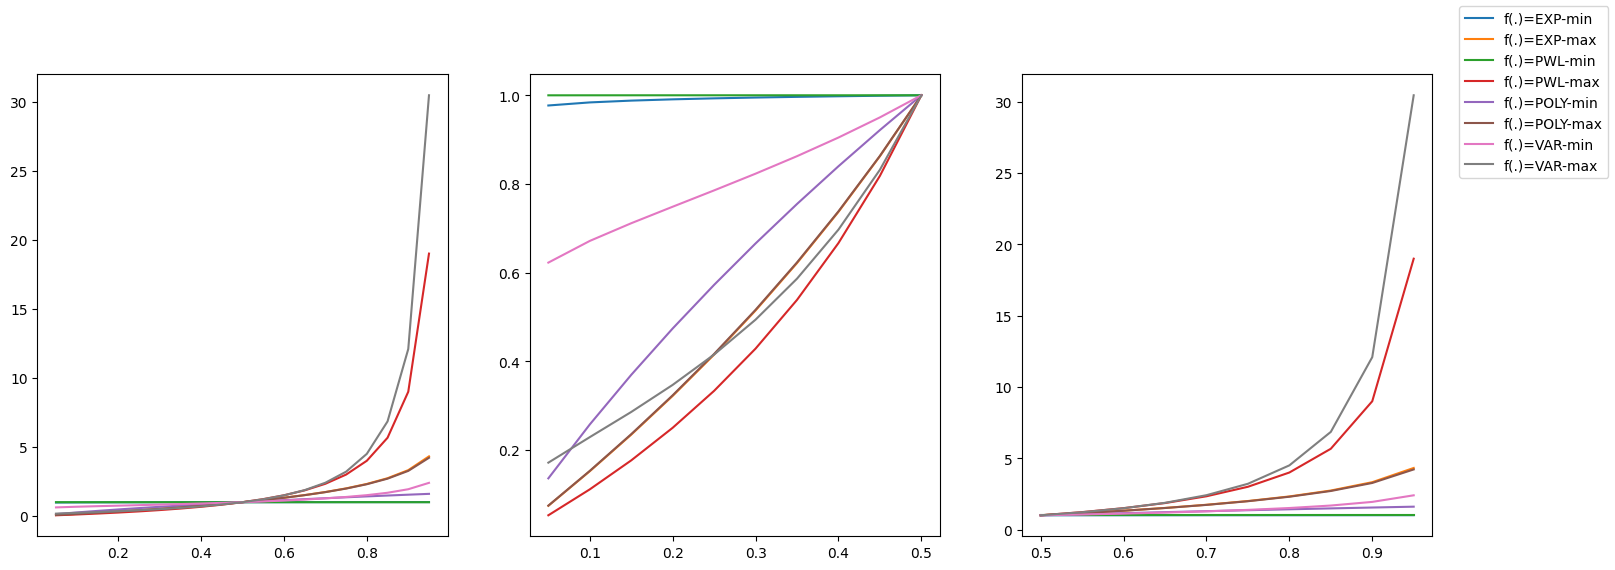

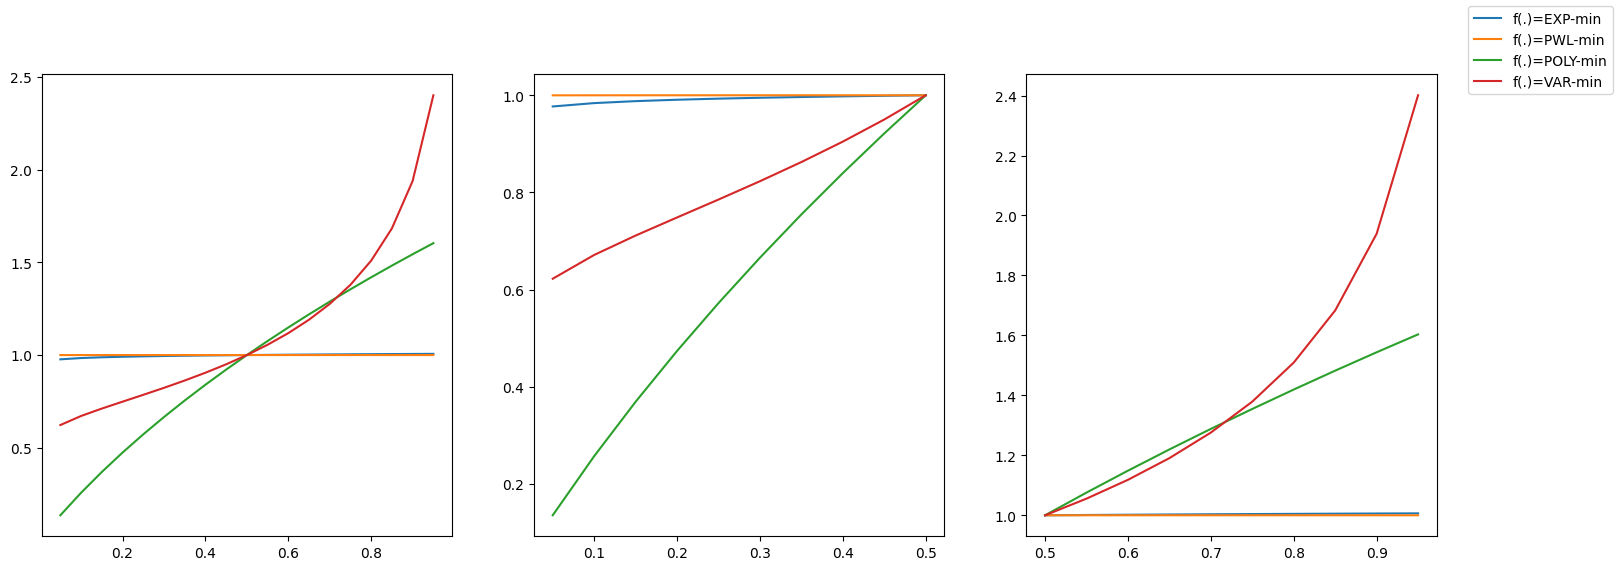

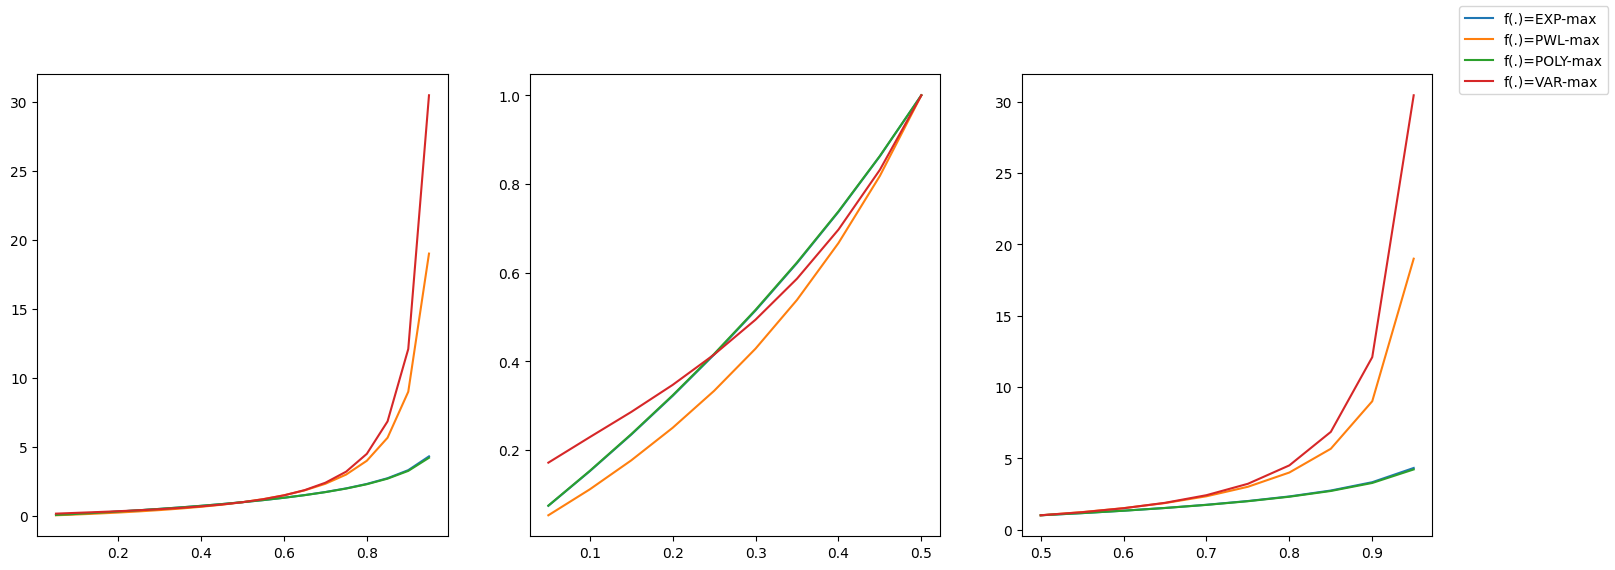

In [75]:
_bc.build_empirical_graph_limits_each_function(_empirical_result)

## Limites Empiricos para Multiplos p'

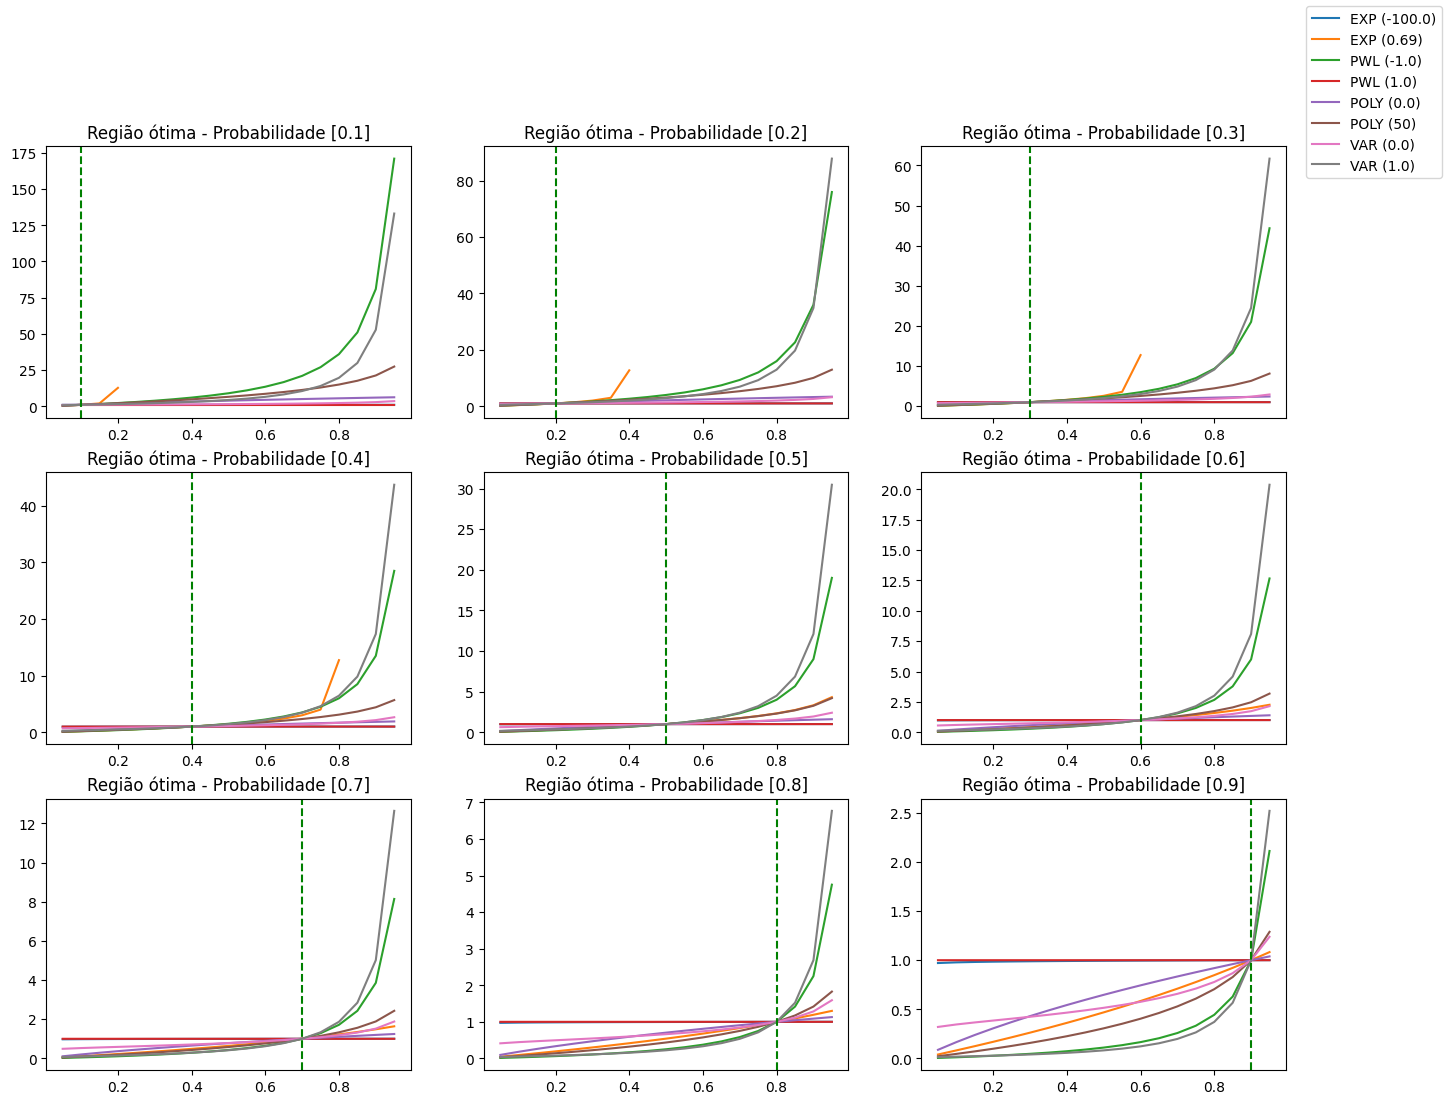

In [73]:
_cp.plot_all_curves_subplots_multiple_probabilities(_multi_empirical_result, list_p)

In [25]:
_multi_empirical_result['EXP'].keys()
_multi_empirical_result['PWL'].keys()

dict_keys([-1.0, 0.999989999999545])